In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
FILE_PATH = os.path.join(os.path.sep, os.getcwd(), 'source', '')

In [4]:
# Получаем список нужных имен файлов
file_list = os.listdir(path=FILE_PATH)
need_files = list()
years = list()
for i in range(1900, 2001):
    for x in file_list:
        if str(i) in x:
            need_files.append(x)
            years.append(i)

In [5]:
frame = pd.DataFrame()
cols = ['name', 'gender', 'value']  
my_list = []
for file in need_files:
    df = pd.read_csv(FILE_PATH + file, index_col=None, header=None, names=cols)
    my_list.append(df)
    frame = pd.concat(my_list, keys=years, names=['year', 'id'])
    new = frame.groupby(['year', 'name'])['value'].sum()

In [6]:
ruth = pd.DataFrame(new)
ruth = ruth.query("name == ['Ruth', 'Robert']").unstack('name')
ruth.head(10)

value        
name  Robert    Ruth
year                
1900  3845.0  4781.0
1901  2559.0  3989.0
1902  3201.0  4401.0
1903  3057.0  4531.0
1904  3427.0  4915.0
1905  3431.0  5088.0
1906  3651.0  5159.0
1907  4042.0  5588.0
1908  4245.0  6200.0
1909  4588.0  6526.0

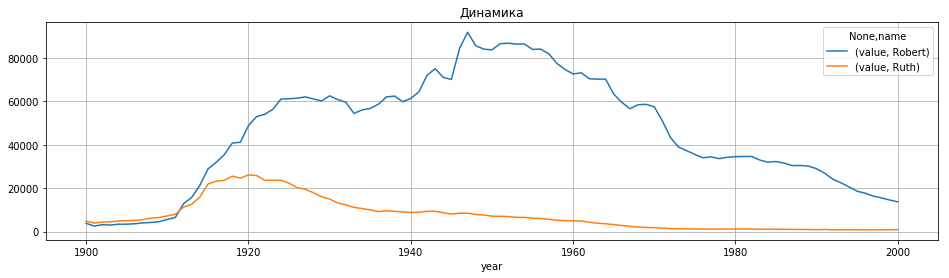

In [7]:
plt.rcParams["figure.figsize"] = (16,4)
ruth.plot(title='Динамика', grid=True)